In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [6]:
import warnings 
warnings.simplefilter("ignore")

In [7]:
df = pd.read_csv(r"D:\ML_Ops\ML_ops_project1\artifacts\raw\HotelReservations.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [8]:
len(df)

36275

In [9]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [10]:
df.drop(columns=['Booking_ID'] , inplace=True)
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [11]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(10275)

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(26000, 18)

In [15]:
df['booking_status'].value_counts()

booking_status
Not_Canceled    18558
Canceled         7442
Name: count, dtype: int64

# Our data is imbalanced 

In [16]:
cat_cols = ['type_of_meal_plan'  , 'required_car_parking_space' , 'room_type_reserved' , 'market_segment_type' , 'repeated_guest' , 'booking_status']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights','lead_time', 'arrival_year', 'arrival_month', 'arrival_date','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

# EDA

In [17]:
data = df.copy()

In [18]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


# Univariate Analysis

In [19]:
def num_plot_dist(df , num_features):
    fig , axes = plt.subplots(len(num_features), 2, figsize=(15,len(num_features)*5))
    if len(num_features)==1:
        axes=[axes]
    
    for i, column in enumerate(num_features):
        sns.histplot(data=df , x=column , ax=axes[i][0] , kde=True , palette="Blues")
        axes[i][0].set_title(f'Histogram for {column}')
        sns.boxplot(data=df , x=column , ax=axes[i][1] , palette="Blues")
        axes[i][1].set_title(f'Box Plot for {column}')
    
    plt.tight_layout()
    plt.show()

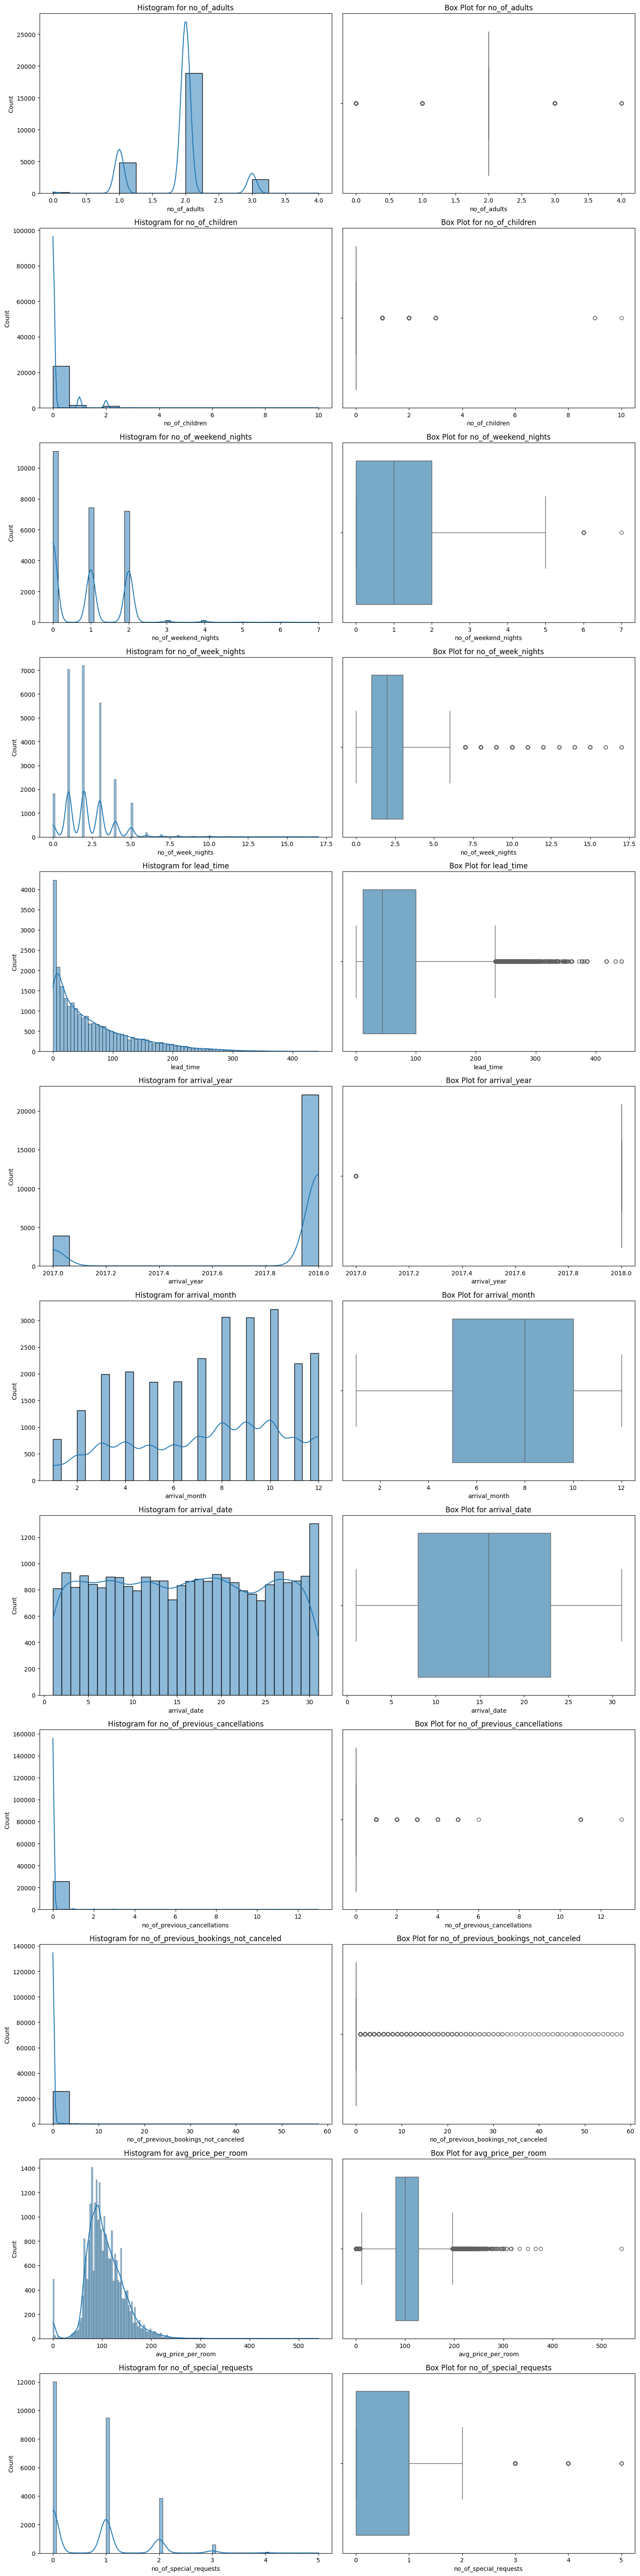

In [20]:
num_plot_dist(data , num_cols)

Univariate for categorical column 

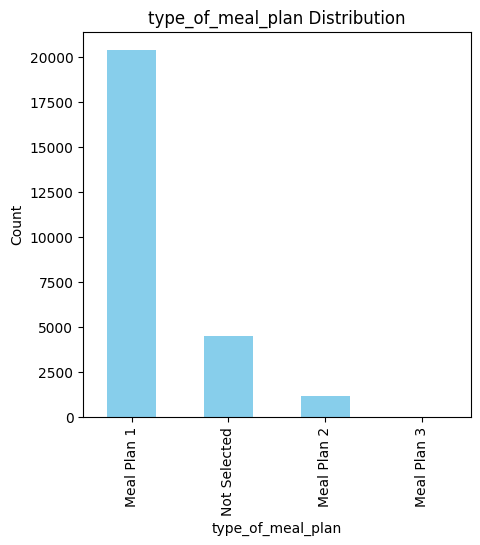

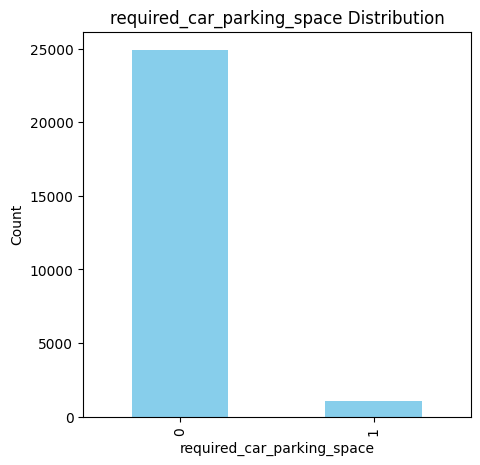

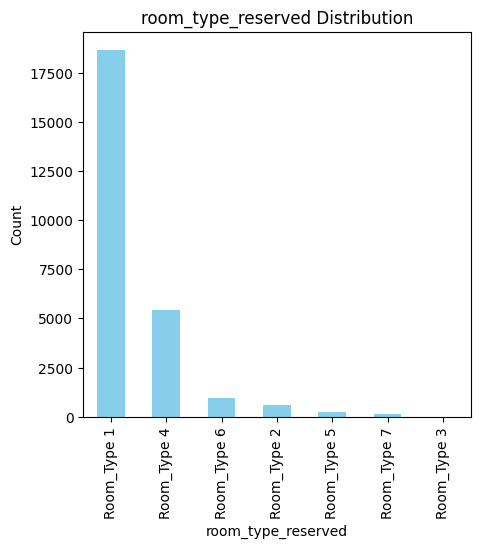

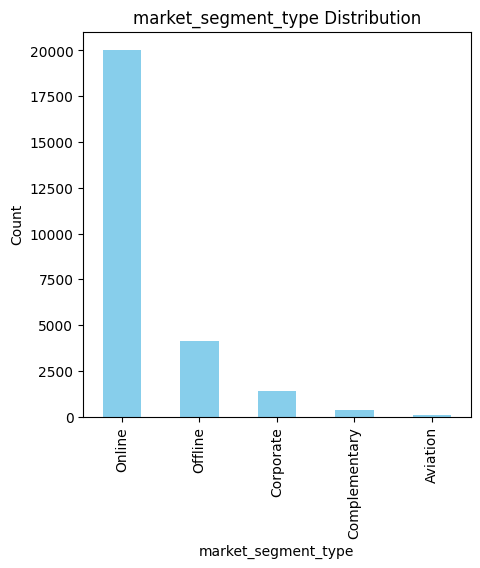

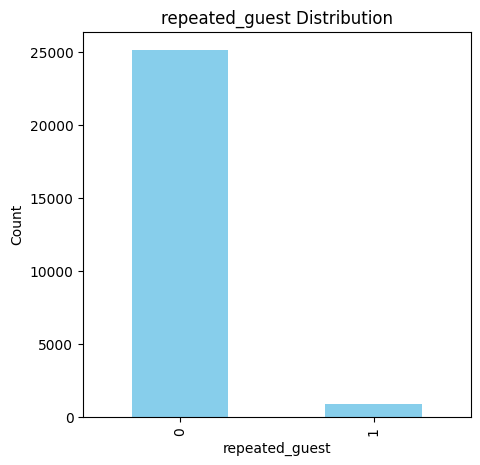

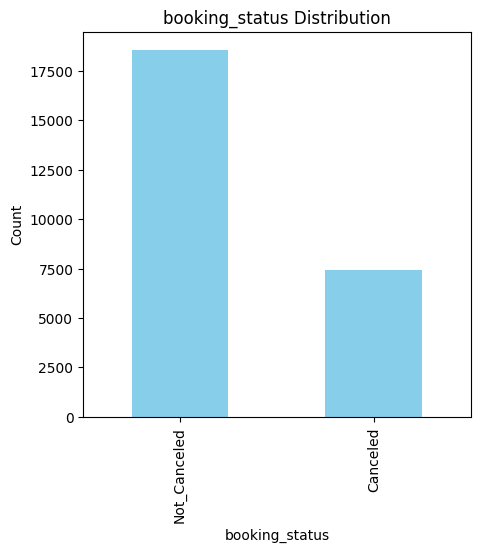

In [21]:
for cat_feature in cat_cols:
    plt.figure(figsize=(5,5))
    data[cat_feature].value_counts().plot(kind='bar' , color='skyblue')
    plt.title(f'{cat_feature} Distribution')
    plt.xlabel(cat_feature)
    plt.ylabel('Count')
    plt.show()

Bivariate Analysis 

In [22]:
def plot_bivariate_num(df , target , num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2
    
    fig , axes = plt.subplots(num_rows, 2 , figsize=(15 , num_rows*5))
    axes = axes.flatten()
    
    for i, column in enumerate(num_features):
        sns.boxplot(x=target, y=column , ax=axes[i] , data=df , palette="Blues")
        axes[i].set_title(f'{column} vs {target}')
    
    plt.tight_layout()
    plt.show()

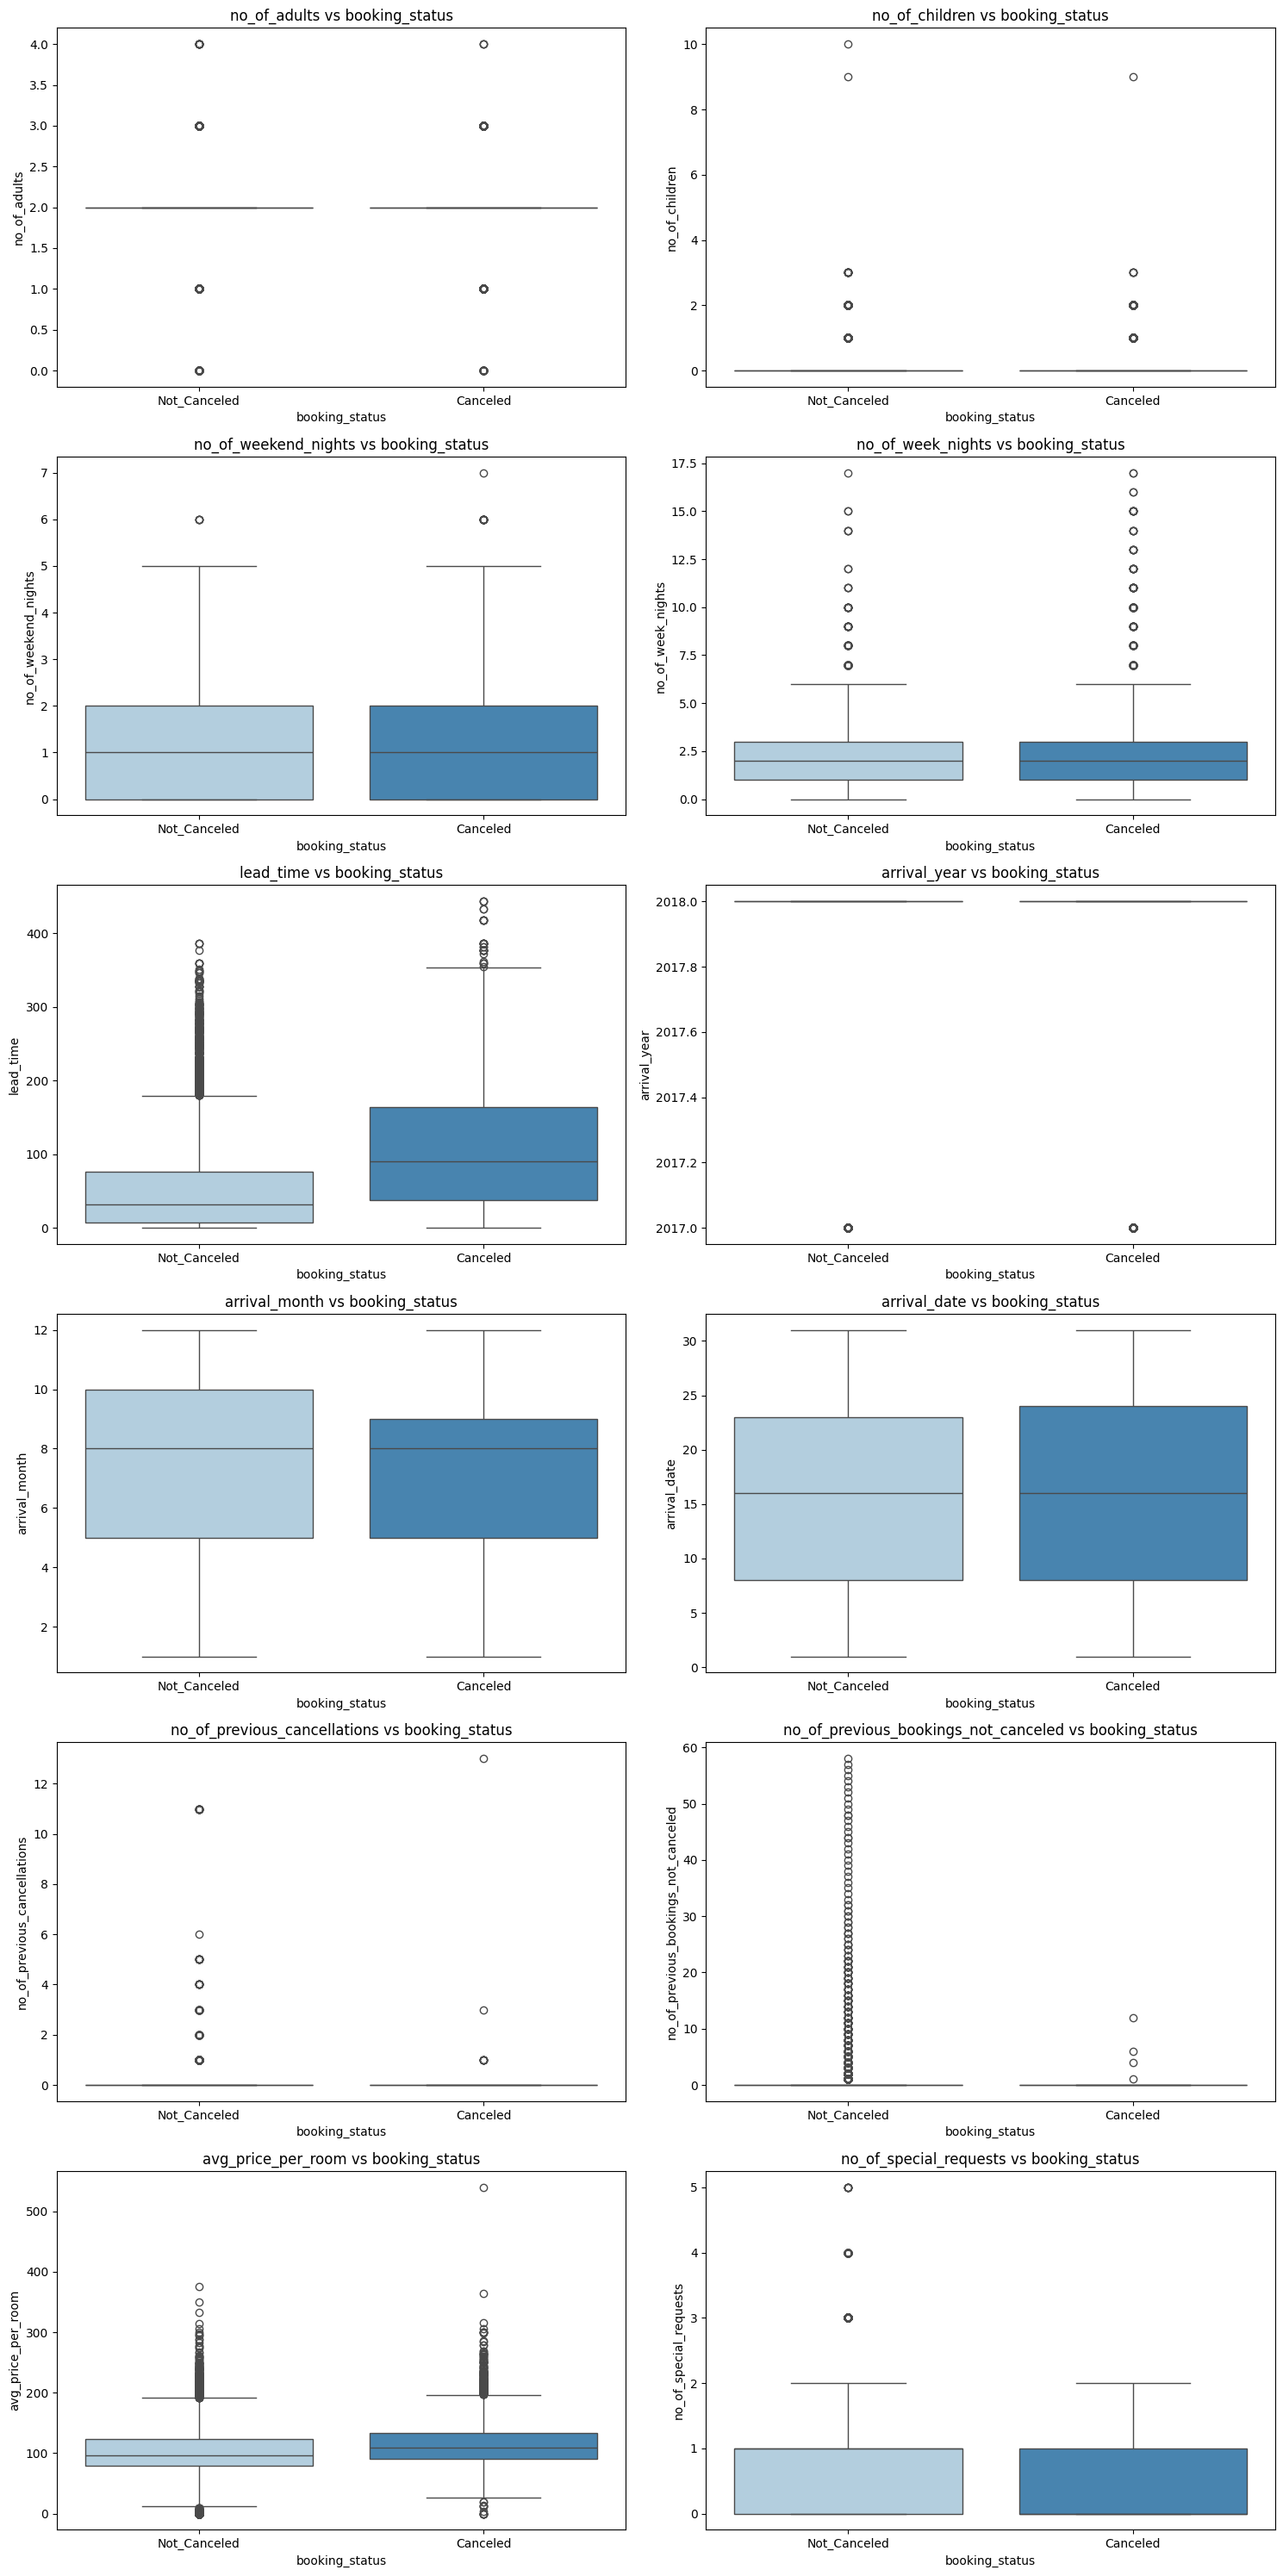

In [23]:
plot_bivariate_num(data , 'booking_status' , num_cols)

<Axes: xlabel='arrival_month', ylabel='avg_price_per_room'>

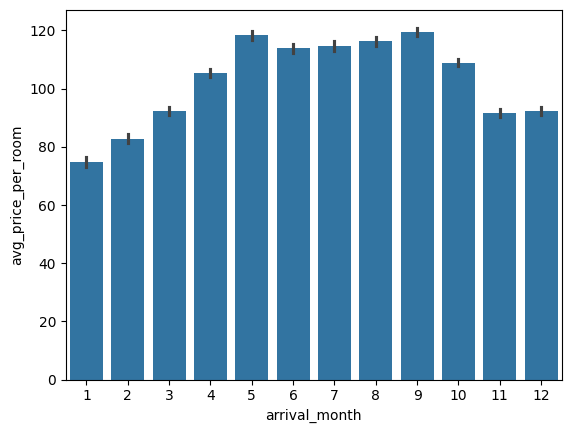

In [24]:
sns.barplot(x='arrival_month' , y='avg_price_per_room' , data = data )

In [25]:
def plot_bivariate_cat(df , target , cat_features):
    num_features = len(cat_features)
    num_rows = (num_features+1)//2
    
    fig , axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
    axes = axes.flatten()
    
    for i , feature in enumerate(cat_features):
        sns.countplot(x=feature , hue = target , data=df , palette='Set2' , ax=axes[i])
        axes[i].set_title(f'{feature} VS {target}')
        axes[i].tick_params(axis='x' , rotation = 90)
    
    plt.tight_layout()
    plt.show()
        

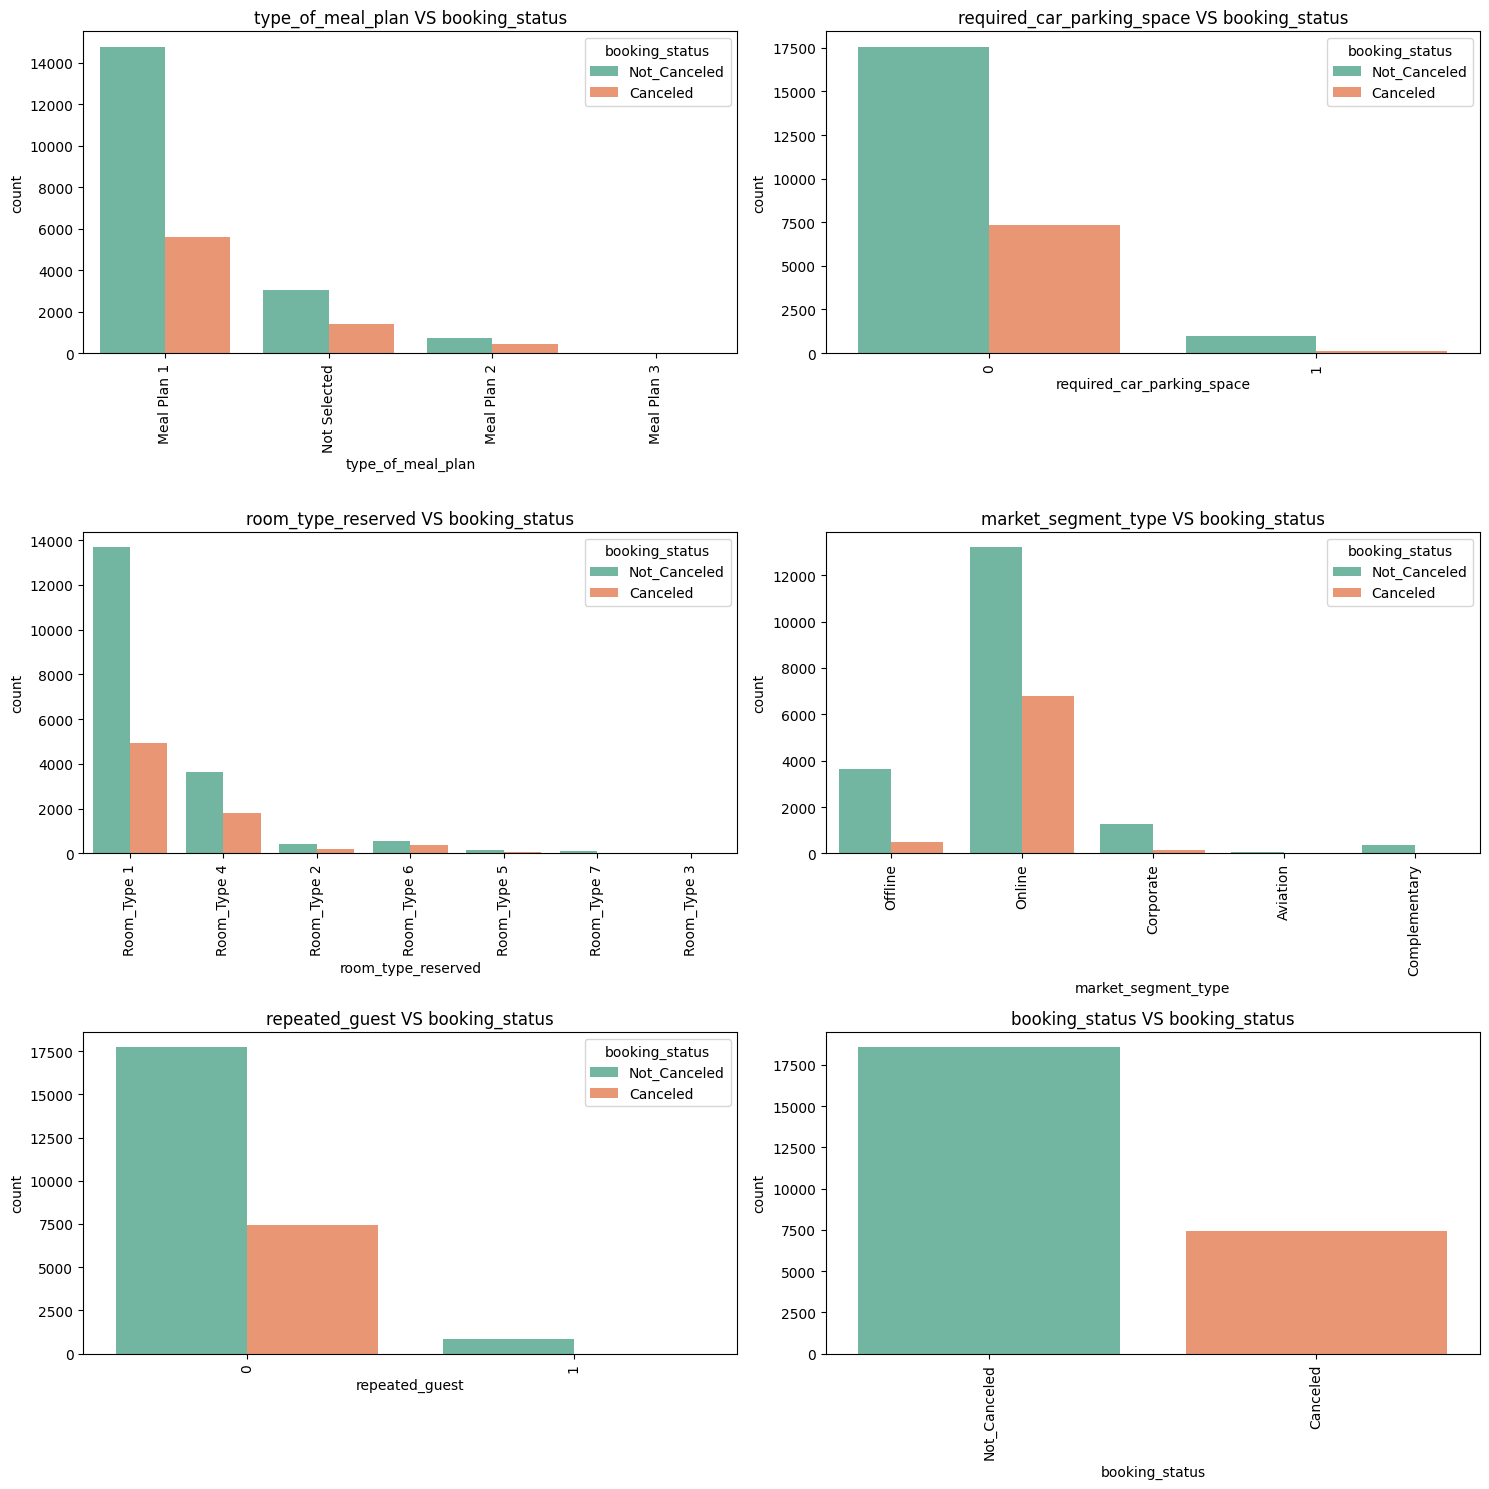

In [26]:
plot_bivariate_cat(data , 'booking_status' , cat_cols)

# Data Processing

In [27]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26000 entries, 0 to 36273
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          26000 non-null  int64  
 1   no_of_children                        26000 non-null  int64  
 2   no_of_weekend_nights                  26000 non-null  int64  
 3   no_of_week_nights                     26000 non-null  int64  
 4   type_of_meal_plan                     26000 non-null  object 
 5   required_car_parking_space            26000 non-null  int64  
 6   room_type_reserved                    26000 non-null  object 
 7   lead_time                             26000 non-null  int64  
 8   arrival_year                          26000 non-null  int64  
 9   arrival_month                         26000 non-null  int64  
 10  arrival_date                          26000 non-null  int64  
 11  market_segment_type 

Label encoding 

In [4]:
from sklearn.preprocessing import LabelEncoder

In [29]:
label_encoder = LabelEncoder()

mappings = {}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
    mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [30]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [31]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26000 entries, 0 to 36273
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          26000 non-null  int64  
 1   no_of_children                        26000 non-null  int64  
 2   no_of_weekend_nights                  26000 non-null  int64  
 3   no_of_week_nights                     26000 non-null  int64  
 4   type_of_meal_plan                     26000 non-null  int64  
 5   required_car_parking_space            26000 non-null  int64  
 6   room_type_reserved                    26000 non-null  int64  
 7   lead_time                             26000 non-null  int64  
 8   arrival_year                          26000 non-null  int64  
 9   arrival_month                         26000 non-null  int64  
 10  arrival_date                          26000 non-null  int64  
 11  market_segment_type 

Multicollinearity check 

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

In [37]:
X = add_constant(df)

vif_data = pd.DataFrame()

vif_data['feature'] = X.columns
vif_data

,feature
0,const
1,no_of_adults
2,no_of_children
3,no_of_weekend_nights
4,no_of_week_nights
5,type_of_meal_plan
6,required_car_parking_space
7,room_type_reserved
8,lead_time
9,arrival_year


In [38]:
vif_data['VIF'] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]

In [39]:
vif_data

,feature,VIF
0,const,4.129913e+07
1,no_of_adults,1.337855e+00
2,no_of_children,1.284896e+00
3,no_of_weekend_nights,1.077614e+00
4,no_of_week_nights,1.131223e+00
5,type_of_meal_plan,1.177405e+00
6,required_car_parking_space,1.032967e+00
7,room_type_reserved,1.555871e+00
8,lead_time,1.411162e+00
9,arrival_year,1.291251e+00


If VIF value >5 then multicollinearity exist for that feature , but here in our dataset we dont have any multicollinearity

In [42]:
corr = df.corr()

In [43]:
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.049246,0.089085,0.110933,-0.010003,-0.002372,0.274697,0.154824,0.094557,0.009344,0.020377,0.306969,-0.240795,-0.063051,-0.146520,0.325352,0.156370,-0.093289
no_of_children,-0.049246,1.000000,0.010017,0.015904,-0.104764,0.020848,0.357778,0.012324,0.030721,0.004888,0.025196,0.096720,-0.049668,-0.021110,-0.029737,0.350109,0.096366,-0.063468
no_of_weekend_nights,0.089085,0.010017,1.000000,0.234186,-0.040495,-0.054212,0.028408,0.134318,0.027833,0.014321,0.005413,0.091357,-0.090030,-0.029229,-0.038840,-0.001932,0.013662,-0.071949
no_of_week_nights,0.110933,0.015904,0.234186,1.000000,-0.077211,-0.059488,0.083989,0.223333,0.015372,0.031120,-0.003860,0.116269,-0.119447,-0.034853,-0.057946,0.015449,0.030336,-0.126924
type_of_meal_plan,-0.010003,-0.104764,-0.040495,-0.077211,1.000000,-0.022719,-0.249130,-0.051198,0.095971,0.009994,-0.005947,0.180623,-0.071741,-0.011717,-0.045657,-0.104665,-0.010854,-0.035108
required_car_parking_space,-0.002372,0.020848,-0.054212,-0.059488,-0.022719,1.000000,0.017725,-0.040525,0.004269,-0.012479,-0.004620,-0.040252,0.107687,0.027046,0.058575,0.057458,0.071079,0.087028
room_type_reserved,0.274697,0.357778,0.028408,0.083989,-0.249130,0.017725,1.000000,-0.013204,0.086421,0.002498,0.029319,0.085663,-0.044617,-0.013340,-0.021578,0.489109,0.088528,-0.072900
lead_time,0.154824,0.012324,0.134318,0.223333,-0.051198,-0.040525,-0.013204,1.000000,0.171537,0.134461,0.036473,0.144750,-0.149185,-0.053972,-0.087298,-0.040446,-0.007849,-0.371473
arrival_year,0.094557,0.030721,0.027833,0.015372,0.095971,0.004269,0.086421,0.171537,1.000000,-0.323118,0.015807,0.108428,-0.008737,0.010835,0.024947,0.173449,-0.001262,-0.152222
arrival_month,0.009344,0.004888,0.014321,0.031120,0.009994,-0.012479,0.002498,0.134461,-0.323118,1.000000,-0.020236,-0.015608,-0.006239,-0.046451,-0.009762,0.067413,0.135426,0.012650


<Axes: >

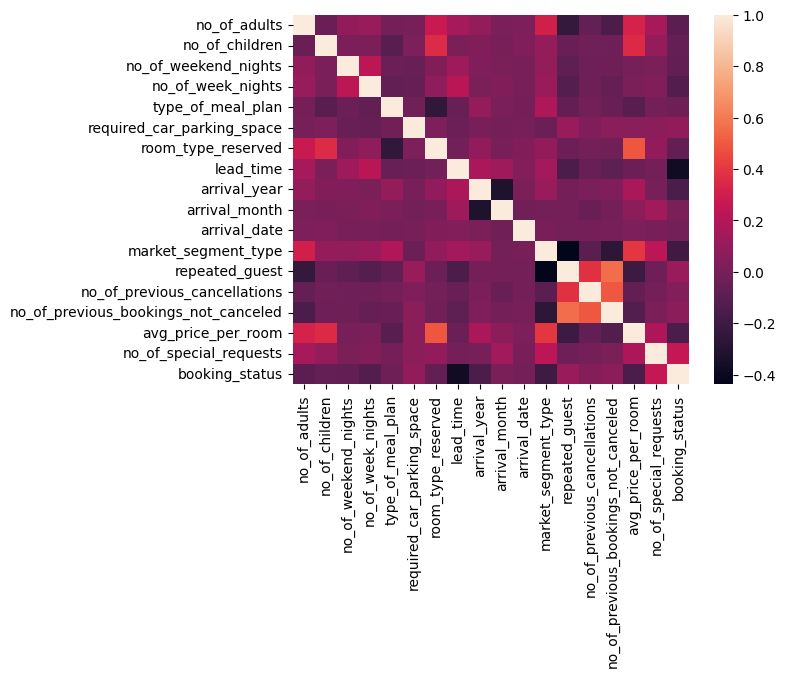

In [46]:
sns.heatmap(corr)

Skewness

In [47]:
skewness = df.skew()
skewness

no_of_adults                            -0.297021
no_of_children                           4.005672
no_of_weekend_nights                     0.659718
no_of_week_nights                        1.601870
type_of_meal_plan                        1.638645
required_car_parking_space               4.559677
room_type_reserved                       1.373156
lead_time                                1.407857
arrival_year                            -1.963466
arrival_month                           -0.292238
arrival_date                             0.012177
market_segment_type                     -2.382309
repeated_guest                           5.249142
no_of_previous_cancellations            21.939192
no_of_previous_bookings_not_canceled    16.298982
avg_price_per_room                       0.588413
no_of_special_requests                   0.911121
booking_status                          -0.945939
dtype: float64

For skewness handling we can use log transformation

In [48]:
for col in df.columns:
    if skewness[col]>5:
        df[col] = np.log1p(df[col])

In [49]:
skewness = df.skew()
skewness

no_of_adults                            -0.297021
no_of_children                           4.005672
no_of_weekend_nights                     0.659718
no_of_week_nights                        1.601870
type_of_meal_plan                        1.638645
required_car_parking_space               4.559677
room_type_reserved                       1.373156
lead_time                                1.407857
arrival_year                            -1.963466
arrival_month                           -0.292238
arrival_date                             0.012177
market_segment_type                     -2.382309
repeated_guest                           5.249142
no_of_previous_cancellations            13.260942
no_of_previous_bookings_not_canceled     7.537942
avg_price_per_room                       0.588413
no_of_special_requests                   0.911121
booking_status                          -0.945939
dtype: float64

Imbalanced Data 

In [50]:
df['booking_status'].value_counts()

booking_status
1    18558
0     7442
Name: count, dtype: int64

Here du to less data we cant perform undersampling , but we can do Oversampling , therefore we will have 30000 rows of data 

In [51]:
X = df.drop(columns=['booking_status'])

y = df['booking_status']

In [53]:
y.value_counts()

booking_status
1    18558
0     7442
Name: count, dtype: int64

In [54]:
from imblearn.over_sampling import SMOTE 

In [55]:
smote = SMOTE(random_state=42)

X_res , y_res = smote.fit_resample(X , y)

  File "d:\ML_Ops\ML_ops_project1\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [57]:
y_res.value_counts()

booking_status
1    18558
0    18558
Name: count, dtype: int64

In [58]:
balanced_df = pd.DataFrame(X_res , columns = X.columns)
balanced_df['booking_status'] = y_res
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0.0,0.0,0.0,65.00,0,1
1,2,0,2,3,3,0,0,5,2018,11,6,4,0.0,0.0,0.0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0.0,0.0,0.0,60.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0.0,0.0,0.0,100.00,0,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0.0,0.0,0.0,94.50,0,0


In [59]:
balanced_df.shape

(37116, 18)

In [60]:
df = balanced_df.copy()

Feature Selection

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']

In [63]:
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [64]:
feature_importance = model.feature_importances_

In [69]:
feature_importance_df = pd.DataFrame({'feature' : X.columns , 'importance' : feature_importance})
top_feature_importance_df = feature_importance_df.sort_values(by='importance' , ascending=False)
top_feature_importance_df

,feature,importance
7,lead_time,0.265648
16,no_of_special_requests,0.179803
15,avg_price_per_room,0.148610
9,arrival_month,0.085852
10,arrival_date,0.083140
11,market_segment_type,0.060441
3,no_of_week_nights,0.045168
2,no_of_weekend_nights,0.028752
4,type_of_meal_plan,0.019965
6,room_type_reserved,0.019119


let us select only top 10 features 

In [71]:
top_10_features = top_feature_importance_df['feature'].head(10).values
top_10_df = df[top_10_features.tolist() + ['booking_status']]
top_10_df.shape

(37116, 11)

In [72]:
df = top_10_df.copy()

# Model Selection 

In [73]:
pip install xgboost lightgbm 


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/43/80/0b5a2dfcf5b4da27b0b68d2833f05d77e1a374d43db951fca200a1f12a52/xgboost-2.1.4-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/5e/23/f8b28ca248bb629b9e08f877dd2965d1994e1674a03d67cd10c5246da248/lightgbm-4.6.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   -----------------

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, recall_score , precision_score , f1_score

In [77]:
X_train , X_test , y_train , y_test = train_test_split(X ,y , test_size=0.2 , random_state=42)

In [79]:
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}

In [76]:
metrics = {
    'Model' : [],
    'Accuracy' : [],
    'Precision' : [],
    'Recall' : [],
    'F1 Score' : []
}

In [80]:
for model_name, classifier in classifiers.items():
    classifier.fit(X_train , y_train)
    y_pred = classifier.predict(X_test)
    
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy_score(y_test , y_pred))
    metrics['Precision'].append(precision_score(y_test , y_pred))
    metrics['Recall'].append(recall_score(y_test , y_pred))
    metrics['F1 Score'].append(f1_score(y_test , y_pred))

[LightGBM] [Info] Number of positive: 14922, number of negative: 14770
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 670
[LightGBM] [Info] Number of data points in the train set: 29692, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502560 -> initscore=0.010239
[LightGBM] [Info] Start training from score 0.010239


In [81]:
metrics_df = pd.DataFrame(metrics)

In [82]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.885911,0.880284,0.887789,0.884020
1,Gradient Boosting,0.834860,0.813966,0.859186,0.835965
2,AdaBoost,0.796471,0.795057,0.787404,0.791212
3,Logistic Regression,0.769127,0.754367,0.783828,0.768816
4,Support Vector Machine,0.660156,0.623859,0.770902,0.689630
5,Decision Tree,0.839844,0.847092,0.821232,0.833962
6,Naive Bayes,0.574353,0.902027,0.146865,0.252602
7,K-Nearest Neighbors,0.783001,0.845681,0.681243,0.754608
8,XGBoost,0.873518,0.865745,0.877888,0.871774
9,LightGBM,0.866918,0.850636,0.883388,0.866703


From here we have decided to go with Random Forest 

Training Random Forest Model 

In [83]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint 


In [85]:
rf = RandomForestClassifier(random_state=42)
param_dist = {
    'n_estimators':randint(100,500),
    'max_depth': randint(10,50),
    'min_samples_split': randint(2,10), 
    'min_samples_leaf':randint(1,5),
    'bootstrap':[True , False]
}

In [87]:
random_search = RandomizedSearchCV(
    estimator = rf , 
    param_distributions= param_dist , 
    n_iter = 10 , 
    cv = 5 ,
    verbose=2 , 
    random_state=42 ,
    n_jobs=-1,
    scoring='accuracy'   
)

In [88]:
random_search.fit(X_train , y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000211785E58B0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000211785E4EC0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000211785E48F0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000211785E4530>},
                   random_state=42, scoring='accuracy', verbose=2)

In [89]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 413}

In [90]:
best_rf_model = random_search.best_estimator_

In [91]:
y_pred = best_rf_model.predict(X_test)
accuracy_score(y_test , y_pred)

0.8860452586206896

In [92]:
precision_score(y_test , y_pred)

0.8770270270270271

In [93]:
recall_score(y_test , y_pred)

0.8924642464246425

In [94]:
f1_score(y_test , y_pred)

0.8846782988004362

In [95]:
import joblib 

In [96]:
joblib.dump(best_rf_model , 'random_forest.pkl')


['random_forest.pkl']

In [97]:
loaded_model = joblib.load('random_forest.pkl')